In [1]:
library()

In [2]:
# OOS cross validation 
# more flexible model is better IS
# 6-10 folds is typical, if data is noisy you can add more folds 

dat = read.csv("FLS-data.csv")

In [3]:
head(dat
    )

y,GDPsh560,Confuncious,Life.Exp,Equip.Inv,SubSahara,Muslim,Rule.of.Law,Yrs.Open,Eco.Org,⋯,Abs.Lat,Work.Pop,High.Enroll,Pop.g,Brit.Col,Outwar.Or,Jewish,Rev...Coup,X.Publ.Edu,Area
1.3690,7.438972,0,47.3,0.05070,0,0.99,0.3333,0.000,0,⋯,3.6720,-1.330292,0.003,0.028417,0,1,0.005,0.123,0.0297,2.382
5.6195,6.284134,0,45.7,0.13090,1,0.00,0.8333,0.356,5,⋯,2.1536,-0.824395,0.000,0.033150,1,0,0.000,0.000,0.0300,0.582
1.2239,6.546785,0,43.4,0.00400,1,0.16,0.5000,0.156,5,⋯,1.0730,-0.716620,0.002,0.026343,0,1,0.000,0.080,0.0221,0.475
2.2322,6.968851,0,47.3,0.04980,1,0.02,0.3333,0.000,1,⋯,0.3684,-0.774140,0.005,0.027473,0,1,0.000,0.360,0.0311,0.342
-0.0553,5.517453,0,42.2,0.00600,1,0.42,0.5000,0.000,0,⋯,0.9007,-0.670017,0.001,0.022771,0,0,0.000,0.720,0.0095,1.222
-0.1592,6.771935,0,45.2,0.00443,1,0.30,0.1667,0.222,3,⋯,0.6694,-0.834250,0.002,0.027276,1,0,0.000,0.547,0.0260,0.239


In [4]:
?runif

In [5]:
set.seed(23094)


In [6]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [7]:
dat$set<-ifelse(runif(n=nrow(dat))>0.5,yes=2,no=1)

In [8]:
head(dat$set
    )

[1] 1 1 2 1 1 1

In [9]:
colnames(dat)

[1] "y"           "GDPsh560"    "Confuncious" "Life.Exp"    "Equip.Inv"  
 [6] "SubSahara"   "Muslim"      "Rule.of.Law" "Yrs.Open"    "Eco.Org"    
[11] "Protestants" "NEquip.Inv"  "Mining"      "LatAmerica"  "PrSc.Enroll"
[16] "Buddha"      "Bl.Mkt.Pm"   "Catholic"    "Civl.Lib"    "Hindu"      
[21] "Pr.Exports"  "Pol.Rights"  "R.FEX.Dist"  "Age"         "War.Dummy"  
[26] "English.."   "Foreign.."   "Lab.Force"   "Spanish.Col" "EthnoL.Frac"
[31] "std.BMP."    "French.Col"  "Abs.Lat"     "Work.Pop"    "High.Enroll"
[36] "Pop.g"       "Brit.Col"    "Outwar.Or"   "Jewish"      "Rev...Coup" 
[41] "X.Publ.Edu"  "Area"        "set"

In [10]:
y.1 <- dat[which(dat$set==1),1]                     #Defines y=variable 1 if set=1
  x.1 <- as.matrix(dat[which(dat$set==1),-1])         #Defines x=all but variable 1 if set=1
  y.2 <- dat[which(dat$set==2),1]                     #y=var 1 if set=2; set 2 is 
  x.2 <- as.matrix(dat[which(dat$set==2),-1])         # x=all but var1 if set=2


Call:  glmnet(x = x.1, y = y.1, family = "gaussian") 

      Df   %Dev    Lambda
 [1,]  0 0.0000 1.0440000
 [2,]  1 0.0699 0.9516000
 [3,]  1 0.1279 0.8671000
 [4,]  1 0.1761 0.7900000
 [5,]  2 0.2179 0.7199000
 [6,]  3 0.2723 0.6559000
 [7,]  4 0.3242 0.5976000
 [8,]  6 0.3761 0.5445000
 [9,]  6 0.4240 0.4962000
[10,]  6 0.4637 0.4521000
[11,]  6 0.4966 0.4119000
[12,]  7 0.5298 0.3753000
[13,]  8 0.5578 0.3420000
[14,]  9 0.5895 0.3116000
[15,]  9 0.6162 0.2839000
[16,] 11 0.6479 0.2587000
[17,] 11 0.6798 0.2357000
[18,] 12 0.7076 0.2148000
[19,] 13 0.7330 0.1957000
[20,] 14 0.7586 0.1783000
[21,] 14 0.7806 0.1625000
[22,] 14 0.7988 0.1480000
[23,] 15 0.8140 0.1349000
[24,] 17 0.8282 0.1229000
[25,] 18 0.8421 0.1120000
[26,] 18 0.8537 0.1020000
[27,] 20 0.8663 0.0929700
[28,] 21 0.8775 0.0847100
[29,] 21 0.8870 0.0771900
[30,] 21 0.8948 0.0703300
[31,] 21 0.9014 0.0640800
[32,] 21 0.9090 0.0583900
[33,] 22 0.9161 0.0532000
[34,] 22 0.9223 0.0484800
[35,] 23 0.9274 0.0441700
[36,] 23

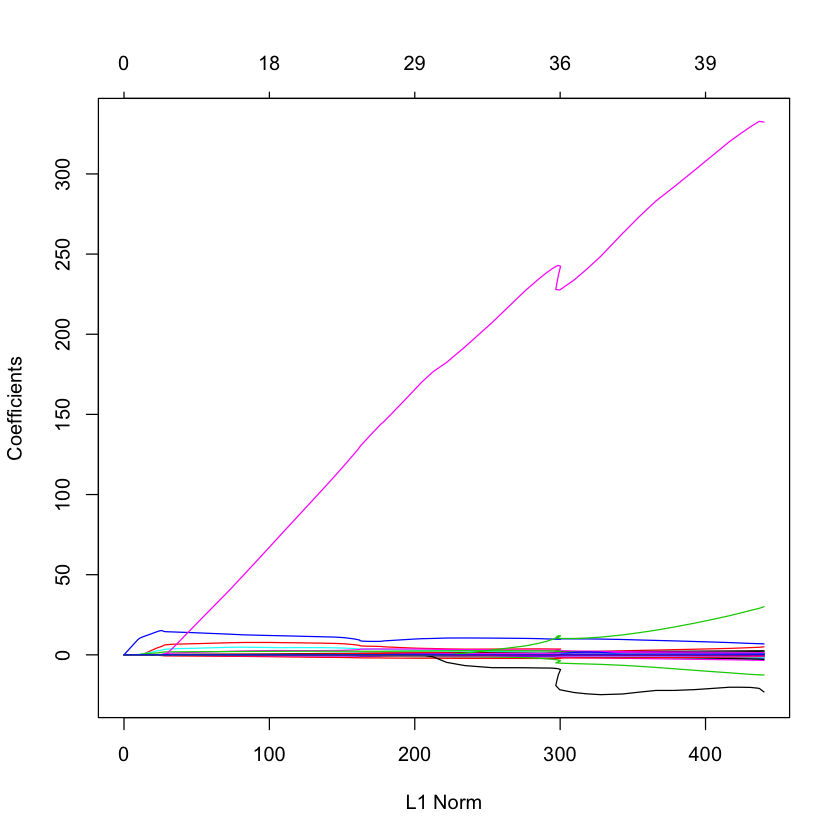

In [11]:
eq.1<-glmnet(y=y.1, x= x.1, family="gaussian")
eq.1
plot(eq.1) 

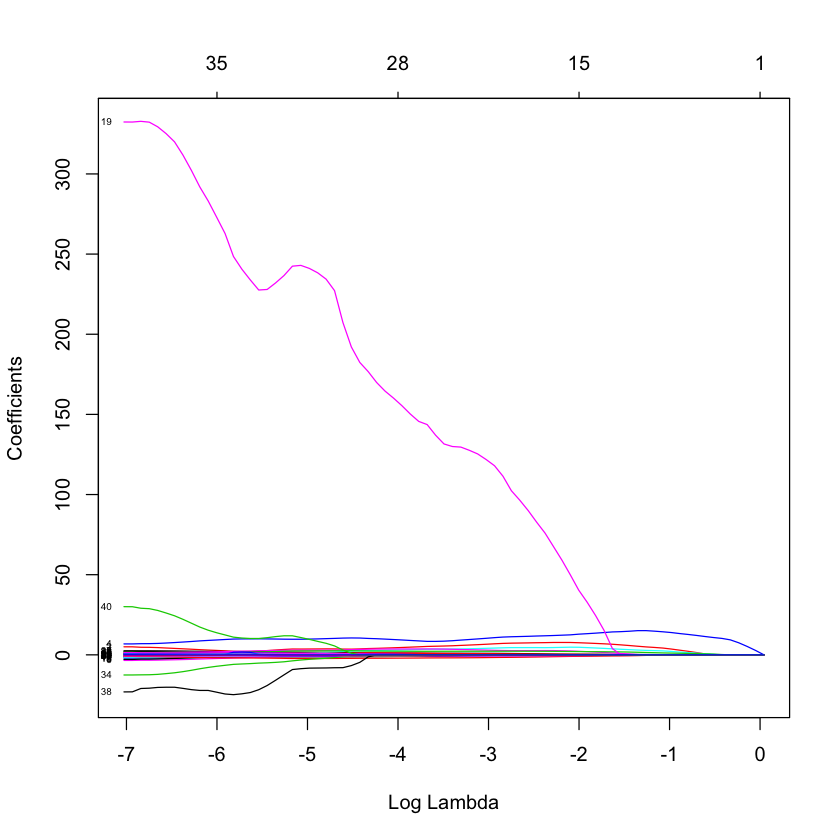

In [12]:
plot(eq.1,"lambda",label=TRUE)  #Same thing, different x-axis scale


In [13]:
cv.1<-cv.glmnet(y=y.1,x=x.1,family="gaussian")


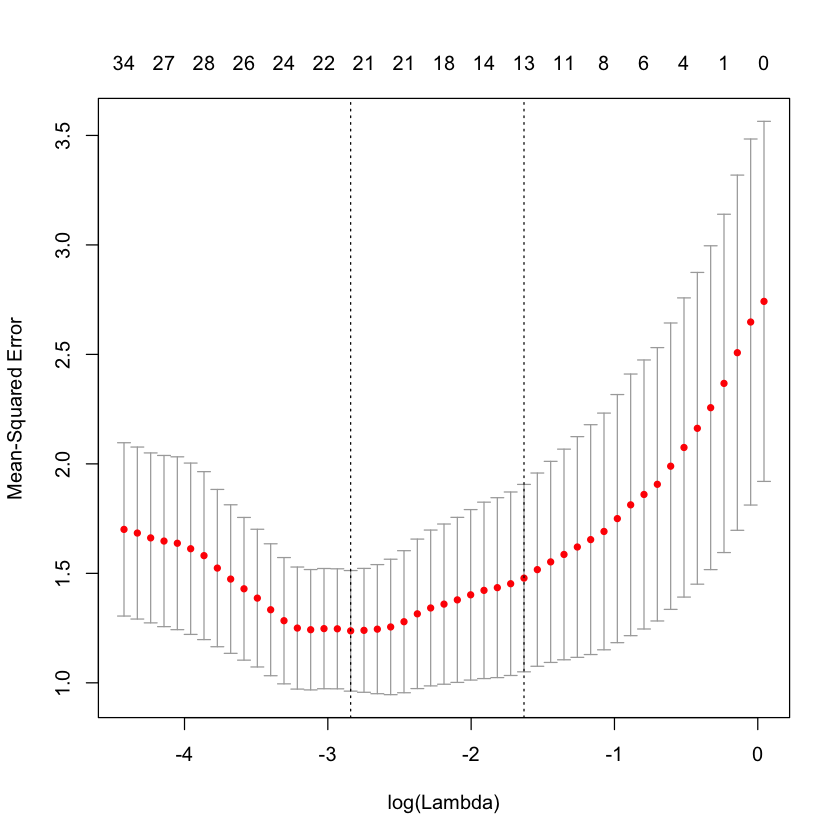

In [14]:
plot(cv.1)

In [15]:
# usually take the lowest plus one standard deviation so we dont fit on noise as much

In [16]:
# we have been throwing out noisy x's

In [17]:
coef(cv.1)
  # Another way to do this

43 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  0.076985353
GDPsh560     .          
Confuncious  6.604493905
Life.Exp     .          
Equip.Inv   14.298318262
SubSahara    .          
Muslim       .          
Rule.of.Law  0.289415635
Yrs.Open     0.208415352
Eco.Org      .          
Protestants -0.135603451
NEquip.Inv   3.756760346
Mining       1.182857165
LatAmerica   .          
PrSc.Enroll  .          
Buddha       1.880524030
Bl.Mkt.Pm    .          
Catholic     .          
Civl.Lib     .          
Hindu        3.906026368
Pr.Exports   .          
Pol.Rights   .          
R.FEX.Dist  -0.001330299
Age          .          
War.Dummy    .          
English..    .          
Foreign..    .          
Lab.Force    .          
Spanish.Col  .          
EthnoL.Frac  .          
std.BMP.    -0.008130730
French.Col   .          
Abs.Lat      .          
Work.Pop    -0.687530315
High.Enroll  .          
Pop.g        .          
Brit.Col     .          
Outwar.O

In [18]:
predict.1.1 <- predict(cv.1, newx=x.1)
predict.1.2 <- predict(cv.1, newx=x.2)


In [22]:
oosmse.1<-mean((y.2-predict.1.2)^2)
summary(oosmse.1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.021   2.021   2.021   2.021   2.021   2.021 

In [29]:
#mse is important when you start comparing to other models


Call:  glmnet(x = x.2, y = y.2, family = "gaussian") 

       Df    %Dev  Lambda
  [1,]  0 0.00000 1.36700
  [2,]  1 0.03941 1.30500
  [3,]  1 0.07531 1.24600
  [4,]  3 0.11970 1.18900
  [5,]  3 0.17170 1.13500
  [6,]  3 0.21910 1.08400
  [7,]  3 0.26230 1.03400
  [8,]  4 0.30510 0.98740
  [9,]  4 0.34500 0.94250
 [10,]  4 0.38130 0.89970
 [11,]  4 0.41450 0.85880
 [12,]  4 0.44470 0.81970
 [13,]  4 0.47220 0.78250
 [14,]  4 0.49720 0.74690
 [15,]  4 0.52010 0.71300
 [16,]  4 0.54090 0.68060
 [17,]  4 0.55980 0.64960
 [18,]  5 0.57870 0.62010
 [19,]  5 0.59620 0.59190
 [20,]  5 0.61210 0.56500
 [21,]  5 0.62660 0.53930
 [22,]  5 0.63980 0.51480
 [23,]  5 0.65190 0.49140
 [24,]  7 0.66470 0.46910
 [25,]  7 0.67780 0.44780
 [26,]  8 0.69270 0.42740
 [27,]  8 0.70720 0.40800
 [28,]  9 0.72230 0.38940
 [29,] 10 0.73730 0.37170
 [30,] 10 0.75200 0.35480
 [31,] 12 0.76580 0.33870
 [32,] 12 0.77990 0.32330
 [33,] 12 0.79280 0.30860
 [34,] 12 0.80440 0.29460
 [35,] 12 0.81510 0.28120
 [36,] 1

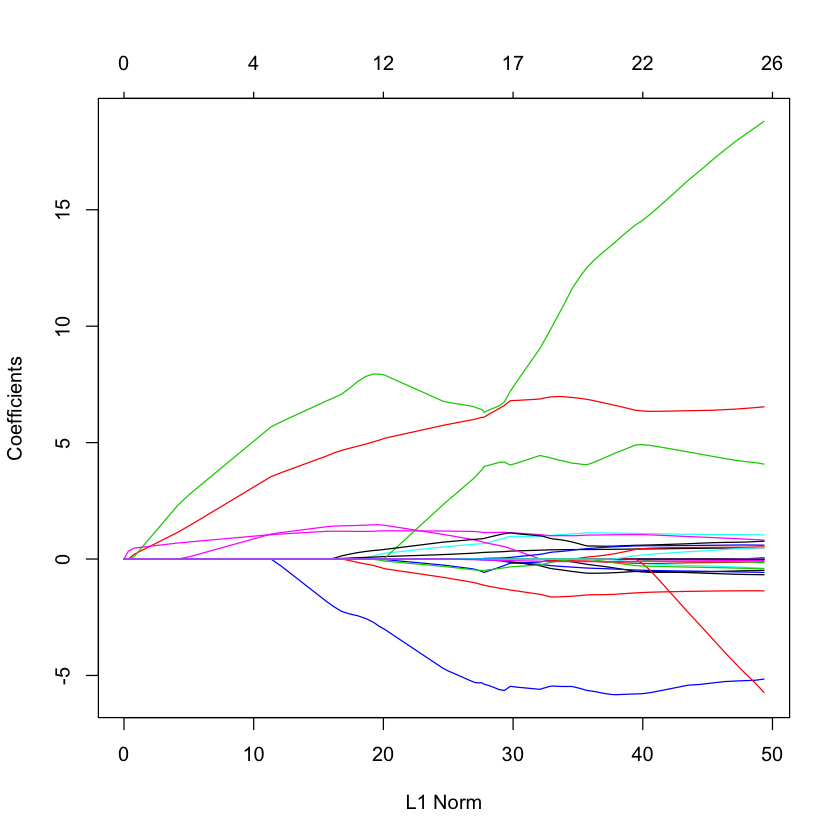

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

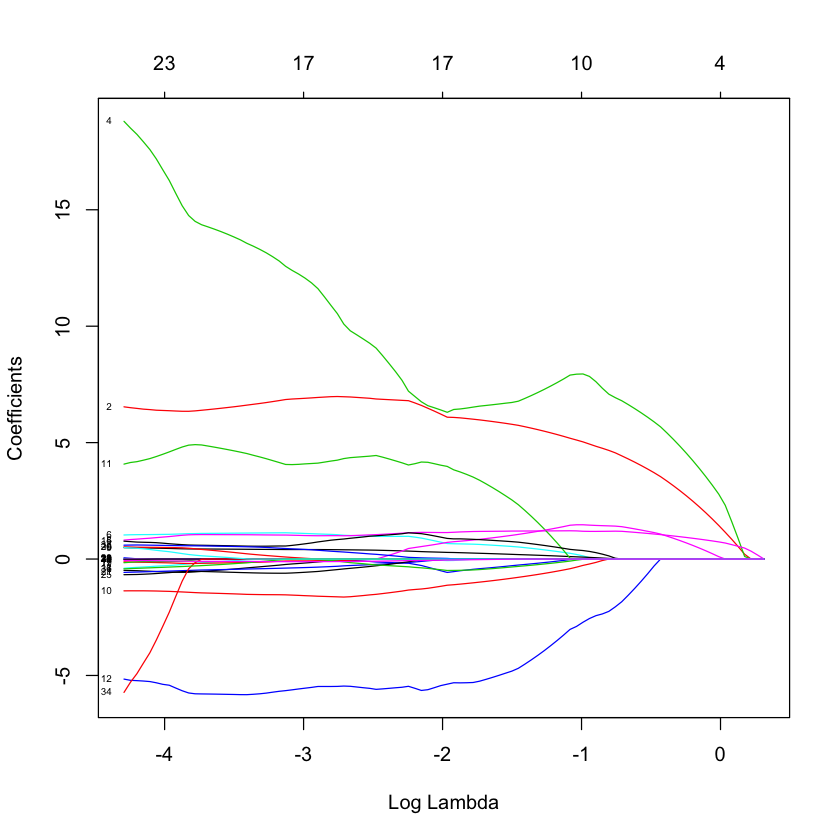

43 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) -0.5683652
GDPsh560     .        
Confuncious  5.7417841
Life.Exp     .        
Equip.Inv    6.7791617
SubSahara   -0.2578815
Muslim       0.5180497
Rule.of.Law  .        
Yrs.Open     1.2023109
Eco.Org      0.1914460
Protestants -0.7849411
NEquip.Inv   2.3319590
Mining      -4.6921473
LatAmerica   .        
PrSc.Enroll  1.0587286
Buddha       0.7248857
Bl.Mkt.Pm    .        
Catholic     .        
Civl.Lib     .        
Hindu        .        
Pr.Exports   .        
Pol.Rights   .        
R.FEX.Dist   .        
Age          .        
War.Dummy    .        
English..    .        
Foreign..    .        
Lab.Force    .        
Spanish.Col -0.3157870
EthnoL.Frac  .        
std.BMP.     .        
French.Col   .        
Abs.Lat      .        
Work.Pop     .        
High.Enroll  .        
Pop.g        .        
Brit.Col     .        
Outwar.Or    .        
Jewish       .        
Rev...Coup   .        
X.Publ.Edu   . 

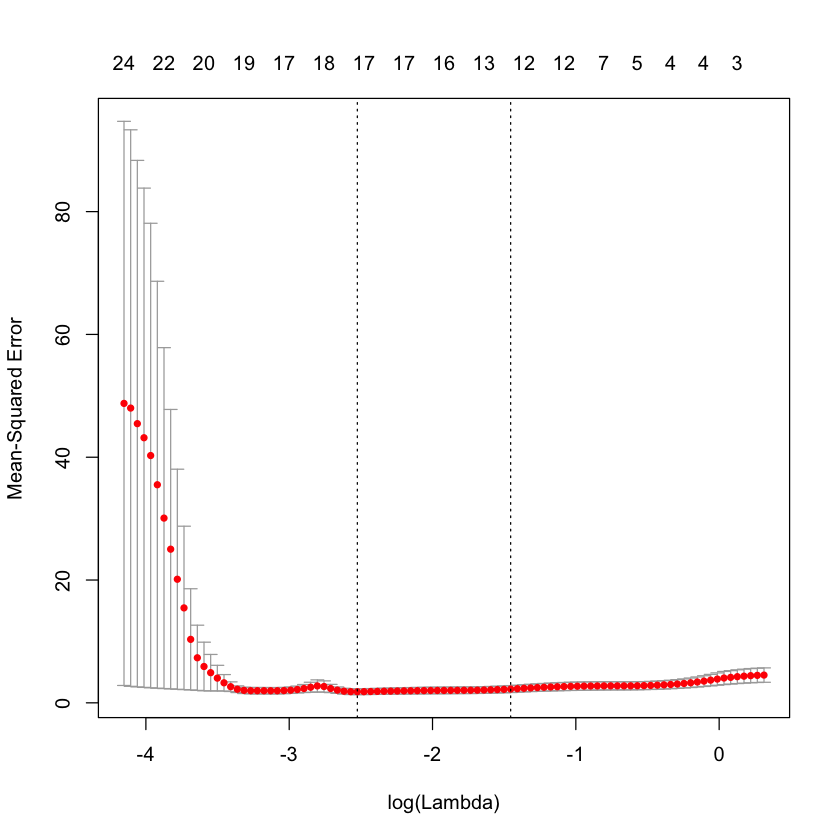

In [30]:
eq.2<-glmnet(y=y.2, x= x.2, family="gaussian")
  eq.2
  plot(eq.2)   #plots lasso coefficient paths
  plot(eq.2,"lambda",label=TRUE)  #Same thing, different x-axis scale
  # cv.glmnet() uses x-validation to estimate optimal lambda
  cv.2<-cv.glmnet(y=y.2,x=x.2,family="gaussian")
#  cv.2
  plot(cv.2) 
  # Print out coefficients at optimal lambda
  coef(cv.2)

In [31]:
predict.2.1 <- predict(cv.2, newx=x.1)
  predict.2.2 <- predict(cv.2, newx=x.2)
  oosmse.2<-mean((y.1-predict.2.1)^2)
  summary(oosmse.2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.799   1.799   1.799   1.799   1.799   1.799 

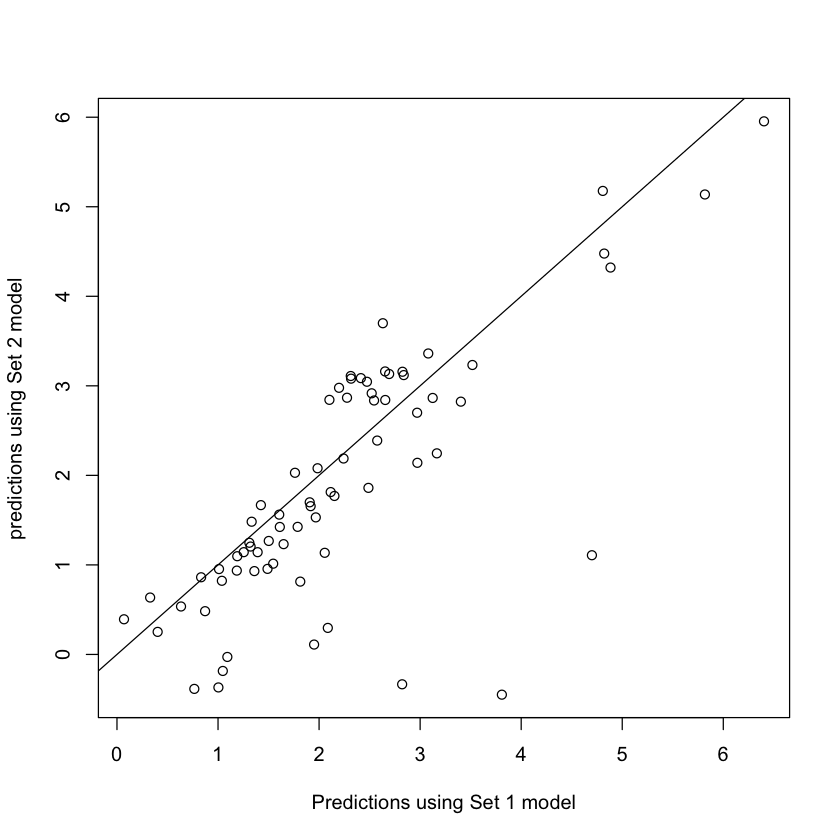

In [32]:
 plot(x=c(predict.1.1,predict.1.2), y=c(predict.2.1,predict.2.2), 
       xlab="Predictions using Set 1 model", ylab="predictions using Set 2 model")
  abline(a=0,b=1)  